# Space Titanic dataset analyse

Import required packages

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the dataset

In [49]:
filename = "train.csv"
df = pd.read_csv(os.path.join("data", filename))

# Inspect the dataset

In [50]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [51]:
print(f"Shape: {df.shape}")
print()
print(f"Datatypes:\n{df.dtypes}")

print()

Shape: (8693, 14)

Datatypes:
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object



## Inspect missing values

In [52]:
df[df.isna().sum(axis=1) > 0]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False
16,0014_01,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,False
23,0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8667,9250_01,Europa,False,E/597/P,TRAPPIST-1e,29.0,False,0.0,2972.0,NaN,28.0,188.0,Chain Reedectied,True
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,True
8684,9274_01,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True


In [53]:
df[df.isna().sum(axis=1) > 0].isna().sum(axis=1).value_counts()

1    1867
2     203
3      17
Name: count, dtype: int64

In [54]:
df[df["HomePlanet"].isna()].isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep         2
Cabin             6
Destination       4
Age               2
VIP               3
RoomService       6
FoodCourt         2
ShoppingMall      7
Spa               3
VRDeck            1
Name              7
Transported       0
dtype: int64

In [55]:
df["CryoSleep"].value_counts()

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

In [56]:
df[df["CryoSleep"]==True].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,2955.000000,2969.0,2967.0,2941.0,2972.0,2975.0
mean,27.405415,0.0,0.0,0.0,0.0,0.0
std,15.080469,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0
25%,18.000000,0.0,0.0,0.0,0.0,0.0
50%,26.000000,0.0,0.0,0.0,0.0,0.0
75%,37.000000,0.0,0.0,0.0,0.0,0.0
max,78.000000,0.0,0.0,0.0,0.0,0.0


Conclusions:
 - Dataset contains 8693 rows described by 14 attributes
 - Columns are either floats or strings. Only target column is bool.
 - Almost all columns contain around 200 missing values. The majority of rows have 0 or 1 missing values.
    - 1867 rows have one missing value. Because of large percentage of those rows in dataset, some imputation will be needed.
    - Only 203 rows have 2 missing values. Only 17 rows have 3 missing values. There is no row with more than 3 missing values.
 - Column 'Transported' is target, that we have to predict.
 - 'Passenger_id' column contains two numbers: first indicates a group (number of ticket?) the passenger is travelling with. Second number is their number within the group.
 - 'CryoSleep' columns indicate whether passenger is confied to his room. Those people don't spend any money - this information may be helpful for data imputing.
 - VIP passenger has paid for special services
 - Last name of passenger may indicate, if passengers in group are a family.
 

Things to do during feature engineering and data cleaning phase:
 - impute missing values or remove rows containing them.
 - divide columns PassengerId and Cabin into more atomic attributes
 - bucketize 'Age' and expenses columns
 - Create new features: 'is_travelling_alone', 'is_travelling_with_family'

# Data preparation

Data cleaning and feature engineering that will faciliate analysis and help to get better predictions.

## Impute values

### Rows with three missing values

In [10]:
df[df.isna().sum(axis=1) == 3]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
1203,1284_01,Mars,True,F/247/S,NaN,NaN,False,0.0,NaN,0.0,0.0,0.0,Hal Knité,True
2639,2822_02,Earth,NaN,G/450/S,TRAPPIST-1e,5.0,NaN,0.0,0.0,0.0,0.0,NaN,Salley Harverez,False
2762,2970_01,Earth,False,NaN,TRAPPIST-1e,NaN,False,740.0,82.0,6.0,NaN,1.0,Dwin Adkinson,False
3072,3315_01,Earth,NaN,F/627/S,TRAPPIST-1e,15.0,False,10.0,0.0,99.0,NaN,2031.0,NaN,False
3535,3790_01,NaN,True,G/620/P,TRAPPIST-1e,13.0,False,0.0,NaN,0.0,NaN,0.0,Trick Meyersones,True
3882,4167_01,Earth,False,NaN,PSO J318.5-22,NaN,NaN,0.0,440.0,0.0,0.0,334.0,Ninaha Deckerson,False
4164,4446_05,Europa,NaN,B/175/S,TRAPPIST-1e,33.0,False,0.0,4017.0,NaN,NaN,2260.0,Phah Chocaters,True
4548,4840_01,NaN,True,F/915/S,TRAPPIST-1e,36.0,False,0.0,0.0,NaN,0.0,0.0,NaN,True
5208,5555_01,NaN,False,G/896/S,NaN,43.0,NaN,1.0,0.0,213.0,7.0,701.0,Winia Blanglison,True
5409,5777_01,Earth,NaN,F/1199/P,PSO J318.5-22,46.0,NaN,559.0,25.0,NaN,22.0,765.0,Katen River,False


### Divide id column 

In [62]:
df[["TicketId", "InvidualId"]] = df["PassengerId"].str.split("_", expand=True)

### Imput cryosleep
CryoSleep column was filled with value based on sum of expenses those passengers made. I assumed, that if particular person didn't spent any money then they probably were in cryosleep. Otherwise I assumed that they weren't in cryosleep

In [57]:
print(df[df["CryoSleep"].isna()][expenses_columns].sum(axis=1))

92         0.0
98       703.0
104     2018.0
111        0.0
152      990.0
         ...  
8620       0.0
8651       0.0
8664       0.0
8675    2056.0
8687    3540.0
Length: 217, dtype: float64


In [58]:
df.loc[(df["CryoSleep"].isna()) & (df[expenses_columns].sum(axis=1) > 0), "CryoSleep"] = True
df.loc[(df["CryoSleep"].isna()) & (df[expenses_columns].sum(axis=1) == 0), "CryoSleep"] = False

### Impute names

In [72]:
tickets_id = df.loc[(df["Name"].isna()) & (df["InvidualId"] != "01"), "TicketId"]
tickets_id

77      0082
101     0108
297     0330
305     0337
411     0448
        ... 
7435    7950
7836    8366
8460    9034
8510    9081
8629    9205
Name: TicketId, Length: 65, dtype: object

In [78]:
tickets_id.values

array(['0082', '0108', '0330', '0337', '0448', '0753', '0770', '0984',
       '1108', '1238', '1287', '1393', '1491', '1865', '1916', '1959',
       '2055', '2092', '2215', '2291', '2589', '2760', '3476', '3496',
       '3680', '3732', '3755', '3862', '3903', '3911', '4005', '4014',
       '4044', '4061', '4182', '4441', '4680', '4726', '4822', '4980',
       '5044', '5052', '5065', '5133', '5527', '5625', '5643', '5698',
       '5756', '5977', '6141', '6433', '6654', '6675', '6708', '6825',
       '7010', '7290', '7596', '7703', '7950', '8366', '9034', '9081',
       '9205'], dtype=object)

In [82]:
df.loc[df["TicketId"].isin(tickets_id.values)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TicketId,InvidualId
75,0082_01,Mars,False,F/16/P,TRAPPIST-1e,42.0,False,7406.0,0.0,0.0,0.0,0.0,Totse Datte,False,0082,01
76,0082_02,Mars,True,F/16/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Eaturs Datte,True,0082,02
77,0082_03,Mars,False,F/16/P,TRAPPIST-1e,8.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True,0082,03
100,0108_01,Earth,True,G/19/S,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Natald Handertiz,False,0108,01
101,0108_02,Earth,False,G/19/S,TRAPPIST-1e,31.0,False,562.0,0.0,326.0,0.0,0.0,NaN,False,0108,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8513,9081_07,Earth,True,G/1476/P,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Aliey Clemondsey,True,9081,07
8514,9081_08,Earth,True,G/1476/P,PSO J318.5-22,3.0,False,0.0,0.0,0.0,0.0,0.0,Virgie Clemondsey,True,9081,08
8628,9205_01,Europa,True,B/300/P,55 Cancri e,37.0,False,0.0,0.0,0.0,0.0,0.0,Thaldah Brakeng,True,9205,01
8629,9205_02,Europa,True,B/300/P,TRAPPIST-1e,15.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True,9205,02


### Impute Age

CryoSleep
False    Axes(0.125,0.11;0.775x0.77)
True     Axes(0.125,0.11;0.775x0.77)
Name: Age, dtype: object

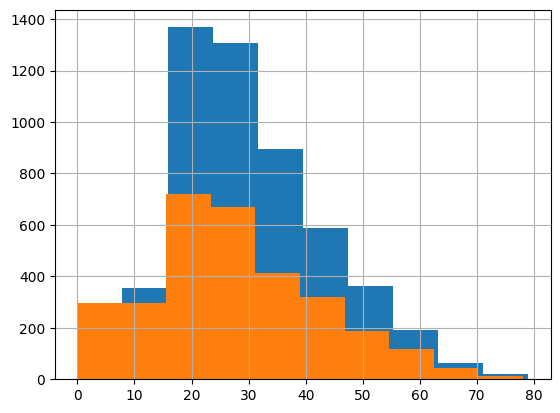

In [116]:
df.groupby(["CryoSleep"])["Age"].hist()

### Impute Cabin

In [103]:
df.groupby("Destination")["Deck"].value_counts()

Destination    Deck
55 Cancri e    F        398
               G        365
               B        333
               C        317
               E        116
               D        113
               A        108
PSO J318.5-22  G        461
               F        241
               E         41
               D         17
               C         13
               B          3
               A          2
TRAPPIST-1e    F       2088
               G       1688
               E        696
               B        426
               C        405
               D        338
               A        142
               T          5
Name: count, dtype: int64

In [102]:
df.groupby("HomePlanet")["Deck"].value_counts()

HomePlanet  Deck
Earth       G       2498
            F       1614
            E        395
Europa      B        766
            C        734
            A        252
            D        186
            E        128
            T          4
Mars        F       1110
            E        330
            D        282
Name: count, dtype: int64

### Impute Destination

In [100]:
df.groupby("HomePlanet")["Destination"].value_counts()

HomePlanet  Destination  
Earth       TRAPPIST-1e      3101
            PSO J318.5-22     712
            55 Cancri e       690
Europa      TRAPPIST-1e      1189
            55 Cancri e       886
            PSO J318.5-22      19
Mars        TRAPPIST-1e      1475
            55 Cancri e       193
            PSO J318.5-22      49
Name: count, dtype: int64

In [101]:
df.groupby("Deck")["Destination"].value_counts()

Deck  Destination  
A     TRAPPIST-1e       142
      55 Cancri e       108
      PSO J318.5-22       2
B     TRAPPIST-1e       426
      55 Cancri e       333
      PSO J318.5-22       3
C     TRAPPIST-1e       405
      55 Cancri e       317
      PSO J318.5-22      13
D     TRAPPIST-1e       338
      55 Cancri e       113
      PSO J318.5-22      17
E     TRAPPIST-1e       696
      55 Cancri e       116
      PSO J318.5-22      41
F     TRAPPIST-1e      2088
      55 Cancri e       398
      PSO J318.5-22     241
G     TRAPPIST-1e      1688
      PSO J318.5-22     461
      55 Cancri e       365
T     TRAPPIST-1e         5
Name: count, dtype: int64

### Impute HomePlanet

In [98]:
df.groupby("Deck")["HomePlanet"].value_counts()

Deck  HomePlanet
A     Europa         252
B     Europa         766
C     Europa         734
D     Mars           282
      Europa         186
E     Earth          395
      Mars           330
      Europa         128
F     Earth         1614
      Mars          1110
G     Earth         2498
T     Europa           4
Name: count, dtype: int64

In [99]:
df.groupby("Destination")["HomePlanet"].value_counts()

Destination    HomePlanet
55 Cancri e    Europa         886
               Earth          690
               Mars           193
PSO J318.5-22  Earth          712
               Mars            49
               Europa          19
TRAPPIST-1e    Earth         3101
               Mars          1475
               Europa        1189
Name: count, dtype: int64

### Impute Expenses

If person was put in cryosleep, then all of missing values in these columns will be filled with `0`. Otherwise they will be filled with mean value, regarding their Age and Vip status.

In [59]:
expenses_columns = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
for col in expenses_columns:
    print(f"{col}")
    print(df[df[col].isna()]["CryoSleep"].value_counts())
    print()

RoomService
CryoSleep
False    111
True      70
Name: count, dtype: int64

FoodCourt
CryoSleep
False    111
True      72
Name: count, dtype: int64

ShoppingMall
CryoSleep
False    107
True     101
Name: count, dtype: int64

Spa
CryoSleep
False    115
True      68
Name: count, dtype: int64

VRDeck
CryoSleep
False    124
True      64
Name: count, dtype: int64



## Create new columns

### Divide name column

In [13]:
df[["FirstName", "LastName"]] = df["Name"].str.split(" ", expand=True)

Actually, I don't think that we need FirstName for this analysis

In [14]:
df = df.drop(columns=["FirstName", "Name"])

### Divide cabin column

In [83]:
df[["Deck", "Num", "Side"]] = df["Cabin"].str.split("/", expand=True)

In [91]:
df.groupby("Deck")["Transported"].value_counts()

Deck  Transported
A     False           129
      True            127
B     True            572
      False           207
C     True            508
      False           239
D     False           271
      True            207
E     False           563
      True            313
F     False          1565
      True           1229
G     True           1321
      False          1238
T     False             4
      True              1
Name: count, dtype: int64

In [90]:
df.groupby("Side")["Transported"].value_counts()

Side  Transported
P     False          2308
      True           1898
S     True           2380
      False          1908
Name: count, dtype: int64

## Bin continous values

# Data Analyse

# Predictions - stage 1

# Predictions - stage 2